# Сборный проект 1

**Задачи исследования**

1. Загрузка данных

2. Подготовка данных к исследованию

3. Исследовательский анализ данных

4. Состовления портрета пользователя каждого региона

5. Проверка гипотез

6. Общий Вывод

**Описание данных**

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

## Загрузим данные и подготовим данные к исследованию

In [3]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**В представленных данных мо можем видеть следующие проблеммы:**

1. Некоректный формат в названиях столбцов

2. Большое количество прорущенных значений

3. Некорректное использование типов данных

In [8]:
# Приведем заголовки к нижнему регистру
games.columns = games.columns.str.lower()

In [9]:
games[games['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Игры без названия и другой полезной информации, можно скинуть, эта информация не принесет пользы
games = games[games['name'].isnull() == False]

Мы имееем пропуски в годах релиза в 269 записях, скидывать их не будем. Заменить просто годом не корректно, так выход игры зависит так же и от платформы релиза. Присвоим пропущенным годам год 2077 в честь Киберпанка2077, этот год в дальнейшем будет меткой показывающей отсутствие года релиза

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(2077)

In [12]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

Для critic_score и user_score есть большое количество пропущенных значений. Можно заменить отсутствующий рейтинг на ноль, в дальнейшем мы будем оценивать эти игры, как игры без рейтинга.

In [13]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
games[games['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
games['critic_score'] = games['critic_score'].fillna(0).astype('int')

In [16]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
games['user_score'] = games['user_score'].replace('tbd', 0).astype('float')

In [18]:
games['user_score'] = games['user_score'].fillna(0)

In [19]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В плане лечения рейтинга, пропущенные значение предлагаю заменить на Unknown, будем дальше оценивать игры у которых рейтинг не известем, представителей этой котегории много 

In [20]:
games['rating'] = games['rating'].fillna('Unknown')

In [21]:
games['name'].unique().tolist()

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

In [22]:
games['name'] = games['name'].str.lower()

# Исследовательский анализ данных

**Узнаем сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

[Text(0.5, 1.0, 'Распределение даты релиза по годам'),
 Text(0.5, 0, 'Год релиза'),
 Text(0, 0.5, 'Количество')]

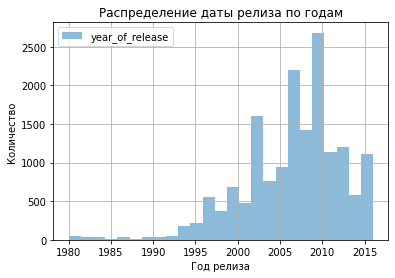

In [23]:
games[games['year_of_release'] != 2077].plot(kind='hist', y='year_of_release', bins = 25, alpha=0.5, grid=True).set(
    title='Распределение даты релиза по годам', xlabel='Год релиза', ylabel='Количество')

Можно сказать, что основную ценность представляет период с 1993 по 2015 года, на этот период приходится большенство релизов игр

In [24]:
#Оставим для дальнейшего анализа данные за выделенный период
games = games[(games['year_of_release'] != 2077)]

In [25]:
games = games[(games['year_of_release'] >= 1993)]

In [26]:
games = games[(games['year_of_release'] <= 2016)]

**Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [27]:
# Посчитаем суммарные продажи
games['sales_total'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [28]:
#Найдем топ 5 платформ по продажам
#games_pivot = games.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(7)
#games_pivot.plot(kind='bar', color='green').set(title='Количество проданных игр, млн.pуб', xlabel='Платформа', ylabel='Суммарные продпжи игр, млнюруб')
#games_pivot

,platform,amount_games,sales_total
14,PS2,2127,"1,233.56"
3,DS,2120,802.76
15,PS3,1306,931.34
24,Wii,1286,891.18
26,X360,1232,961.24
17,PSP,1193,289.53
13,PS,1190,727.58
11,PC,950,252.66
5,GBA,811,312.88
27,XB,803,251.57


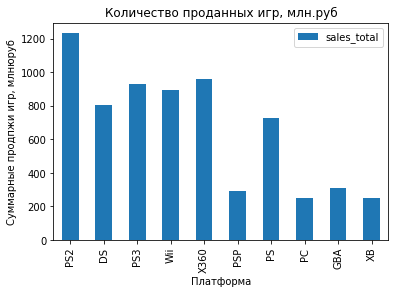

In [29]:
games_pivot = games.groupby('platform', as_index=False) \
    .agg({'name':'count', 'sales_total':'sum'}).sort_values(by=['name', 'sales_total'], ascending=[False, False]).head(10) \
    .rename(columns={'name':'amount_games'})
games_pivot.plot(kind='bar', x='platform', y='sales_total') \
    .set(title='Количество проданных игр, млн.pуб', xlabel='Платформа', ylabel='Суммарные продпжи игр, млнюруб')

games_pivot

[Text(0.5, 1.0, 'Распределение продаж по годам'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Суммарные продпжи')]

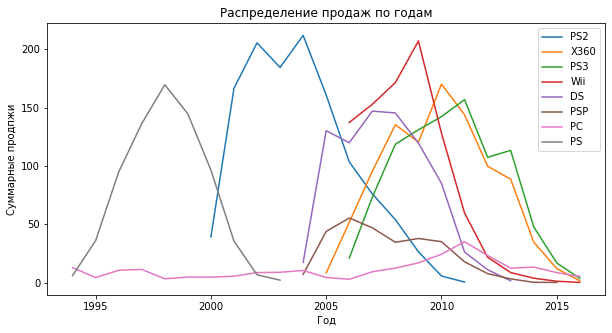

In [30]:
ax = games[games['platform'] == 'PS2'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='PS2', figsize=(10,5))
games[games['platform'] == 'X360'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total',label='X360', ax=ax)
games[games['platform'] == 'PS3'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='PS3', ax=ax)
games[games['platform'] == 'Wii'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='Wii', ax=ax)
games[games['platform'] == 'DS'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='DS', ax=ax)
games[games['platform'] == 'PSP'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='PSP', ax=ax)
games[games['platform'] == 'PC'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='PC', ax=ax)
games[games['platform'] == 'PS'].groupby('year_of_release', as_index=False)['sales_total'].sum().plot(x='year_of_release', y='sales_total', label='PS', ax=ax).set(
    title='Распределение продаж по годам', xlabel='Год', ylabel='Суммарные продпжи')

Для анализа возьмем топ 8 плотформ по продажам, так как разница в суммрных продажах между 5 и 6 местом не так велика как между 6 и 7 местом. Судя по получившимся результатам в среднем период жизни платформы составляет 10 лет

**Посмотрим какие платформы лидируют по продажам, оценим, растут или падают. Выберим несколько потенциально прибыльных платформ.**

In [31]:
sort_pop_platform = games.groupby('platform', as_index=False) \
    .agg({'name':'count', 'sales_total':'sum'}).sort_values(by='sales_total', ascending=False).head(10) \
    .rename(columns={'name':'amount_games'})
sort_pop_platform

,platform,amount_games,sales_total
14,PS2,2127,"1,233.56"
26,X360,1232,961.24
15,PS3,1306,931.34
24,Wii,1286,891.18
3,DS,2120,802.76
13,PS,1190,727.58
16,PS4,392,314.14
5,GBA,811,312.88
17,PSP,1193,289.53
1,3DS,512,257.81


[Text(0.5, 1.0, 'Количество проданных игр, шт'),
 Text(0.5, 0, 'Платформа'),
 Text(0, 0.5, 'Суммарные продпжи игр, млн')]

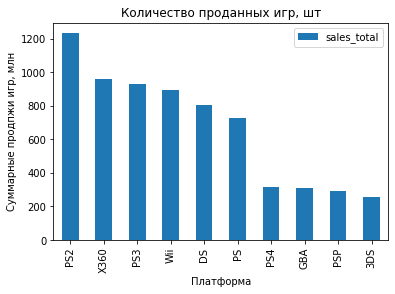

In [32]:
sort_pop_platform.plot(kind='bar', x='platform', y='sales_total') \
    .set(title='Количество проданных игр, шт', xlabel='Платформа', ylabel='Суммарные продпжи игр, млн')

Из проведенного анализа, мы можем сказать, что продажи игр падают на всех платформах начиная с периода жизни платформы в 5 лет. Видимо это связанно, жизненный цикл составляет в среднем 10 лет, через 5 лет платформа начинает устаривать, а так же у нее появляется конкурент в виде более современной платформы. Для выбора потанциально выгодных платформ, следует смотреть не только на количество проданных игр, но и на период жизни. Исходя из этого потенциально прибольными платформами считаю РS3 и Х360

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

Выберим актуальный период. В качестве данного периода предлагаю взять период с 2003 по 2016, так как он охватывает жизненный цикл выбранных топ 5 платформ. В более ранном периоде данные плотформы не представленны и для них отсутствует информацмя для анализа

In [33]:
games = games.query('year_of_release >= 2014')

,platform,amount_games,sales_total
3,PS4,376,288.15
9,XOne,228,140.36
0,3DS,212,86.68
2,PS3,219,68.18
8,X360,111,48.22
7,WiiU,73,42.98
1,PC,151,27.05
5,PSV,295,22.40
6,Wii,11,5.07
4,PSP,13,0.36


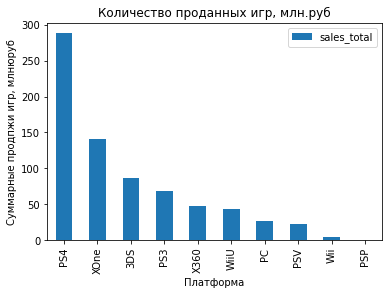

In [34]:
games_pivot = games.groupby('platform', as_index=False) \
    .agg({'name':'count', 'sales_total':'sum'}).sort_values(by=['sales_total'], ascending=[False]).head(10) \
    .rename(columns={'name':'amount_games'})
games_pivot.plot(kind='bar', x='platform', y='sales_total') \
    .set(title='Количество проданных игр, млн.pуб', xlabel='Платформа', ylabel='Суммарные продпжи игр, млнюруб')

games_pivot

In [35]:
top_platforms = ['PS4', 'XOne', '3DS', 'X360']
sort_sales = games.query("platform in @top_platforms")

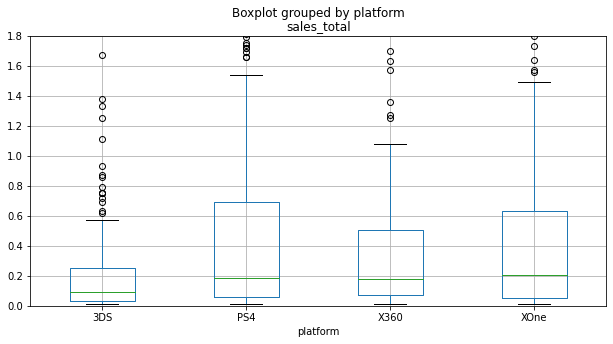

In [36]:
ax =sort_sales.boxplot(column='sales_total', by='platform', figsize=(10,5)).axis(ymin=0,ymax=1.8)


Медиана по топовым платформам варьируется от 0,2 до 3 млн руб.

Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн.
У остальных - от 0,55 до 1,25.
Среди всех выделяется DS - у него эти показатели ниже. Медиана < 0,1 млн, верхняя граница - 0,6 млн.

**Посмотриv, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [37]:
games_critic = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)]

In [38]:
df = games_critic.groupby('critic_score', as_index=False).agg({'sales_total':['sum']})
df.columns = ['critic_score', 'sales_total_sum']
df.sort_values(by='sales_total_sum', ascending=False).head()

,critic_score,sales_total_sum
12,69,2.34
19,83,1.36
16,74,1.16
15,72,1.01
18,82,0.93


In [39]:
df[['critic_score', 'sales_total_sum']].corr()

,critic_score,sales_total_sum
critic_score,1.00,0.45
sales_total_sum,0.45,1.00


[Text(0.5, 1.0, 'Зависимость продаж от рейтинга'),
 Text(0.5, 0, 'Рейтинг'),
 Text(0, 0.5, 'Суммарные продпжи игр, млн.руб.')]

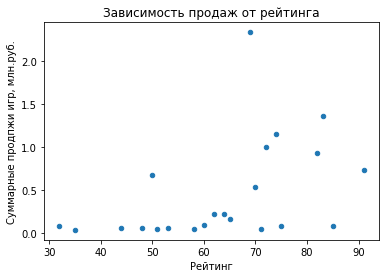

In [40]:
df.plot(kind='scatter', x='critic_score', y='sales_total_sum').set(
    title='Зависимость продаж от рейтинга', xlabel='Рейтинг', ylabel='Суммарные продпжи игр, млн.руб.')

In [41]:
games_user = games[(games['platform'] == 'X360') & (games['user_score'] > 0)]

In [42]:
df = games_user.groupby('user_score', as_index=False).agg({'sales_total':['sum']})
df.columns = ['user_score', 'sales_total_sum']
df.sort_values(by='sales_total_sum', ascending=False).head()

,user_score,sales_total_sum
16,4.90,4.28
10,4.20,2.92
18,5.10,2.51
36,7.30,2.32
21,5.50,2.28


In [43]:
df[['user_score', 'sales_total_sum']].corr()

,user_score,sales_total_sum
user_score,1.00,-0.11
sales_total_sum,-0.11,1.00


[Text(0.5, 1.0, 'Зависимость продаж от рейтинга'),
 Text(0.5, 0, 'Рейтинг'),
 Text(0, 0.5, 'Суммарные продпжи игр, млн.руб.')]

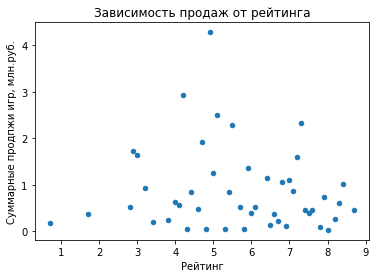

In [44]:
df.plot(kind='scatter', x='user_score', y='sales_total_sum').set(
    title='Зависимость продаж от рейтинга', xlabel='Рейтинг', ylabel='Суммарные продпжи игр, млн.руб.')

In [45]:
critic_score = games[games['critic_score'] > 0]
user_score = games[games['user_score'] > 0]

In [46]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [47]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,50.45%
user_score,50.45%,100.00%


Сильная корреляция прослеживается между продажами и оценкой критиков, анологичная ситуация просматривается и с оценками пользоватей , основное объем продаж приходится на оценку критиков 60 - 100, 6,5 - 9 на оценку пользователей. Оценки критиков и пользователей так же имеют явную положительноую зависмисоть. В целом данную ситуацию можно интерпритировать и на другие платформы так как одинаковые игры могут выходить на разных платформах

**Посмотрим на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?**

In [48]:
games['year_of_release'].unique()

array([2015, 2014, 2016])

In [49]:
sort_genre = games.groupby('genre', as_index=False) \
    .agg({'sales_total':['sum', 'count']}) 
sort_genre.columns = ['genre', 'sales_total', 'amount']
sort_genre.sort_values(by='sales_total', ascending=False)

,genre,sales_total,amount
0,Action,199.36,619
8,Shooter,170.94,128
10,Sports,109.48,161
7,Role-Playing,101.44,221
3,Misc,37.55,113
2,Fighting,28.22,60
6,Racing,27.52,69
4,Platform,18.09,38
1,Adventure,17.55,185
9,Simulation,13.13,44


Можно сказать, что самые продаваемые жанры это Action, Sports, Shooter,Role-Playing, а в оутсайдерах находятся Puzzle,Strategy, Adventure, Simulation

# Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

1. Самые популярные платформы (топ-5). Опишим различия в долях продаж.

2. Самые популярные жанры (топ-5). Поясним разницу.

3. Влияет ли рейтинг ESRB на продажи в отдельном регионе


Самые популярные платформы (топ-5). Опишим различия в долях продаж.

In [50]:
world = games.groupby('platform', as_index=False).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending=False).head()
world   

,platform,sales_total
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


In [51]:
na = games.groupby('platform', as_index=False).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
na['part_%'] = na['na_sales']/world['sales_total']*100
na

,platform,na_sales,part_%
3,PS4,98.61,34.22
9,XOne,81.27,57.90
8,X360,28.30,58.69
0,3DS,22.64,26.12
2,PS3,22.05,32.34


In [52]:
eu = games.groupby('platform', as_index=False).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
eu['part_%'] = eu['eu_sales']/world['sales_total']*100
eu

,platform,eu_sales,part_%
3,PS4,130.04,45.13
9,XOne,46.25,32.95
2,PS3,25.54,37.46
1,PC,17.97,NaN
0,3DS,16.12,18.60


In [53]:
jp = games.groupby('platform', as_index=False).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
jp['part_%'] = jp['jp_sales']/world['sales_total']*100
jp

,platform,jp_sales,part_%
0,3DS,44.24,51.04
3,PS4,15.02,5.21
5,PSV,14.54,NaN
2,PS3,11.22,16.46
7,WiiU,7.31,NaN


По регионам особенно заметно выделяется японский рынок, там свои кумиры

Самые популярные жанры (топ-5). Поясним разницу.

In [54]:
world = games.groupby('genre', as_index=False).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending=False).head()
world

,genre,sales_total
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55


In [55]:
na = games.groupby('genre', as_index=False).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
na['part_%'] = na['na_sales']/world['sales_total']*100
na

,genre,na_sales,part_%
8,Shooter,79.02,46.23
0,Action,72.53,36.38
10,Sports,46.13,42.14
7,Role-Playing,33.47,32.99
3,Misc,15.05,40.08


In [56]:
eu= games.groupby('genre', as_index=False).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
eu['part_%'] = eu['eu_sales']/world['sales_total']*100
eu

,genre,eu_sales,part_%
0,Action,74.68,37.46
8,Shooter,65.52,38.33
10,Sports,45.73,41.77
7,Role-Playing,28.17,27.77
6,Racing,14.13,NaN


In [57]:
jp = games.groupby('genre', as_index=False).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
jp['part_%'] = jp['jp_sales']/world['sales_total']*100
jp

,genre,jp_sales,part_%
7,Role-Playing,31.16,30.72
0,Action,29.58,14.84
2,Fighting,6.37,NaN
3,Misc,5.61,14.94
8,Shooter,4.87,2.85


По жанрам Япония опять отметилась, но есть и общее с остальным миром

In [58]:
world = games.groupby('rating', as_index=False).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending=False).head()
world

,rating,sales_total
2,M,226.54
4,Unknown,198.97
0,E,133.13
3,T,99.13
1,E10+,71.68


In [59]:
na = games.groupby('rating', as_index=False).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
na['part_%'] = na['na_sales']/world['sales_total']*100
na

,rating,na_sales,part_%
2,M,96.42,42.56
4,Unknown,64.72,32.53
0,E,50.74,38.11
3,T,38.95,39.29
1,E10+,33.23,46.36


In [60]:
eu= games.groupby('rating', as_index=False).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
eu['part_%'] = eu['eu_sales']/world['sales_total']*100
eu

,rating,eu_sales,part_%
2,M,93.44,41.25
4,Unknown,58.95,29.63
0,E,58.06,43.61
3,T,34.07,34.37
1,E10+,26.16,36.50


In [61]:
jp = games.groupby('rating', as_index=False).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
jp['part_%'] = jp['jp_sales']/world['sales_total']*100
jp

,rating,jp_sales,part_%
4,Unknown,56.90,28.60
3,T,14.78,14.91
0,E,8.94,6.72
2,M,8.01,3.54
1,E10+,4.46,6.22


По рейтингам, ситуация не сильно отличается от региона к региону. Большую часть так же составляют продажи игр рейтинг которых мы не знаем

# Проверка гипотиз


1. Средние пользовательские рейтинги платформ X360 и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

1. Гипотиза

H0: средний пользовательский рейтинг платформ X360 и PC одинаковый

H1: средний пользовательский рейтинг платформ X360 и PС различается

In [62]:
alpha = 0.05

In [63]:
x360 = games[(games['platform'] == 'X360') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

In [64]:
results = st.ttest_ind(x360, pc)

In [65]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.030983578725445982
Отвергаем нулевую гипотезу


**Результат статистической оценки дает основание предположить, что нуливая гипотиза Н0 неверна**

2. Гипотиза

Н0  Средние пользовательские рейтинги жанров Action и Sports разные

Н1 Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [66]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

In [67]:
results = st.ttest_ind(action, sports)

In [68]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Резкльтат в 20.5% является статистически значемым. можно сказать, что нулевая теория Н0 верна.

NEW **Результат статистической оценки дает основание предположить, что нуливая гипотиза Н0 неверна**

# Вывод

Мы провели исследование представленных исторических данных по продажам игр в разных регионах и вот что можно сказать:

1. основную ценность представляет период с 1993 по 2015 года, на этот период приходится большенство релизов игр


2. для анализа взяли топ 6 плотформ по продажам, так как разница в суммрных продажах между 5 и 6 местом не так велика как между 6 и 7 местом. Судя по получившимся результатам в среднем период жизни платформы составляет 10 лет

- Медиана по топовым платформам на уровне 0.3 млн. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн. У остальных - от 0,6 до 1,15. Среди всех выделяется DS - у него эти показатели ниже. Медиана менее 0,1 млн, верхняя граница - 0,6 млн

3. из проведенного анализа, мы можем сказать, что продажи игр падают на всех платформах начиная с периода жизни платформы в 5 лет. Видимо это связанно с тем, что жизненный цикл составляет в среднем 10 лет, через 5 лет платформа начинает устаривать, а так же у нее появляется конкурент в виде более современной платформы. 


4. сильная корреляция прослеживается между продажами и оценкой критиков, анологичная ситуация просматривается и с оценками пользоватей , основное объем продаж приходится на оценку критиков 60 - 100, 6,5 - 9 на оценку пользователей. Оценки критиков и пользователей так же имеют явную положительноую зависмисоть. В целом данную ситуацию можно интерпритировать и на другие платформы так как одинаковые игры могут выходить на разных платформ 


5. самые продаваемые жанры это Action, Sports, Shooter,Role-Playing, а в оутсайдерах находятся Puzzle,Strategy, Adventure, Simulation


6. Так же выясние предпочтения по плотформам в разных регионах, сильнее всего отличается японский рынок


7. Так же мы выяснили, что результат статистической оценки дает нам предположить что:

- средний пользовательский рейтинг платформ X360 и PС различается

- Средние пользовательские рейтинги жанров Action и Sports одинаковые



Рекомендации:

1. Для выбора потанциально выгодных платформ, следует смотреть не только на количество проданных игр, но и на период жизни. Исходя из этого потенциально прибольными платформами считаю РS3 и Х360

2. Рейтинги хороший индикатор для выбора игр для продажи

3. Разнообразие хорошо, но самые продоваемы игры это игры Action, Sports, Shooter, Misc жанров